In [1]:
import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
fp_df = pd.read_csv('C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/Associations.csv')
fp_df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1,1,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,0
2,0,0,1,1,0,0,1,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,1,0,0,0,0
196,0,0,0,1,0,0,0,0,0,0,0
197,0,1,1,0,1,1,0,0,0,0,0
198,1,0,1,1,1,0,1,1,1,0,0


In [4]:
# Support of 1-tem freq sets
itemFrequency = fp_df.sum(axis=0) / len(fp_df)

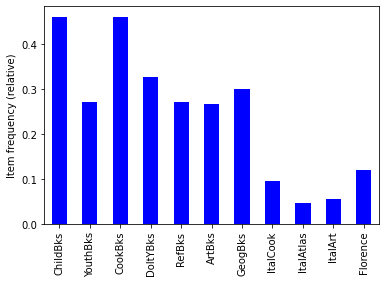

In [5]:
# and plot as histogram
ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
plt.show()

In [6]:
# create frequent itemsets
itemsets = apriori(fp_df, min_support=0.2,
                   use_colnames=True)

In [7]:
# and convert into rules
rules = association_rules(itemsets, metric='confidence', 
                          min_threshold=0.5)
rules.sort_values(by=['lift'], ascending=False).head(6)

rule_df = rules.sort_values(by=['lift'], ascending=False)

In [8]:
print(rule_df[['antecedents','consequents','support','confidence','lift']])

   antecedents consequents  support  confidence      lift
10   (CookBks)   (GeogBks)    0.230    0.500000  1.666667
11   (GeogBks)   (CookBks)    0.230    0.766667  1.666667
9     (ArtBks)   (CookBks)    0.200    0.754717  1.640689
3   (ChildBks)  (DoItYBks)    0.245    0.532609  1.638796
4   (DoItYBks)  (ChildBks)    0.245    0.753846  1.638796
5    (GeogBks)  (ChildBks)    0.225    0.750000  1.630435
0   (YouthBks)  (ChildBks)    0.200    0.740741  1.610306
8     (RefBks)   (CookBks)    0.200    0.740741  1.610306
6    (CookBks)  (DoItYBks)    0.235    0.510870  1.571906
7   (DoItYBks)   (CookBks)    0.235    0.723077  1.571906
1   (ChildBks)   (CookBks)    0.270    0.586957  1.275992
2    (CookBks)  (ChildBks)    0.270    0.586957  1.275992
